# Definition und Repräsentation
Graphen sind abstrakte Strukturen, mit denen sich zahlreiche Sachverhalte mathematisch modellieren und auf unterschiedliche Eigenschaften untersuchen lassen. In diesem Kapitel sollen deshalb veschiedene Arten von Graphen vorgestellt und Probleme, die durch sie modellierbar sind, illustriert werden. Auch wenn die Mathematik durchaus unendliche Graphen kennt, werden wir uns im Folgenden auf endliche Graphen beschränken.

In diesem ersten Abschnitt wird Ihnen eine Definition präsentiert und zusätzlich die Speicherung zur automatisierten Verarbeitung illustriert.

## Inhaltsverzeichnis
- [Informelle Definition](#Informelle-Definition)
- [Formale Definition](#Formale-Definition)
- [Isomorphie](#Isomorphie)
- [Repräsentation in Programmen](#Repräsentation-in-Programmen)
  - [Adjazenzliste](#Adjazenzliste)
  - [Adjazenzmatrix](#Adjazenzmatrix)
- [Dünnbesetzte Matrizen](#Dünnbesetzte-Matrizen)
  - [Coordinate List (COO)](#Coordinate-List-COO)
  - [Dictionary of Keys (DOK)](#Dictionary-of-Keys-DOK)
  - [Compressed Sparse Row (CSR)](#Compressed-Sparse-Row-CSR)

## Informelle Definition
Ein Graph ist eine abstrakte Struktur. Sie enthält Knoten, die beliebige Objekte repräsentieren, und Kanten, die  Verbindungen zwischen diesen Objekten darstellen. Ein anschauliches Beispiel eines Graphen ist das öffentliche Verkehrsnetz einer Stadt. Dabei bilden die Haltestellen die Knoten und die Kanten repräsentieren Linien, die zwischen ihnen verkehren.

<center>
    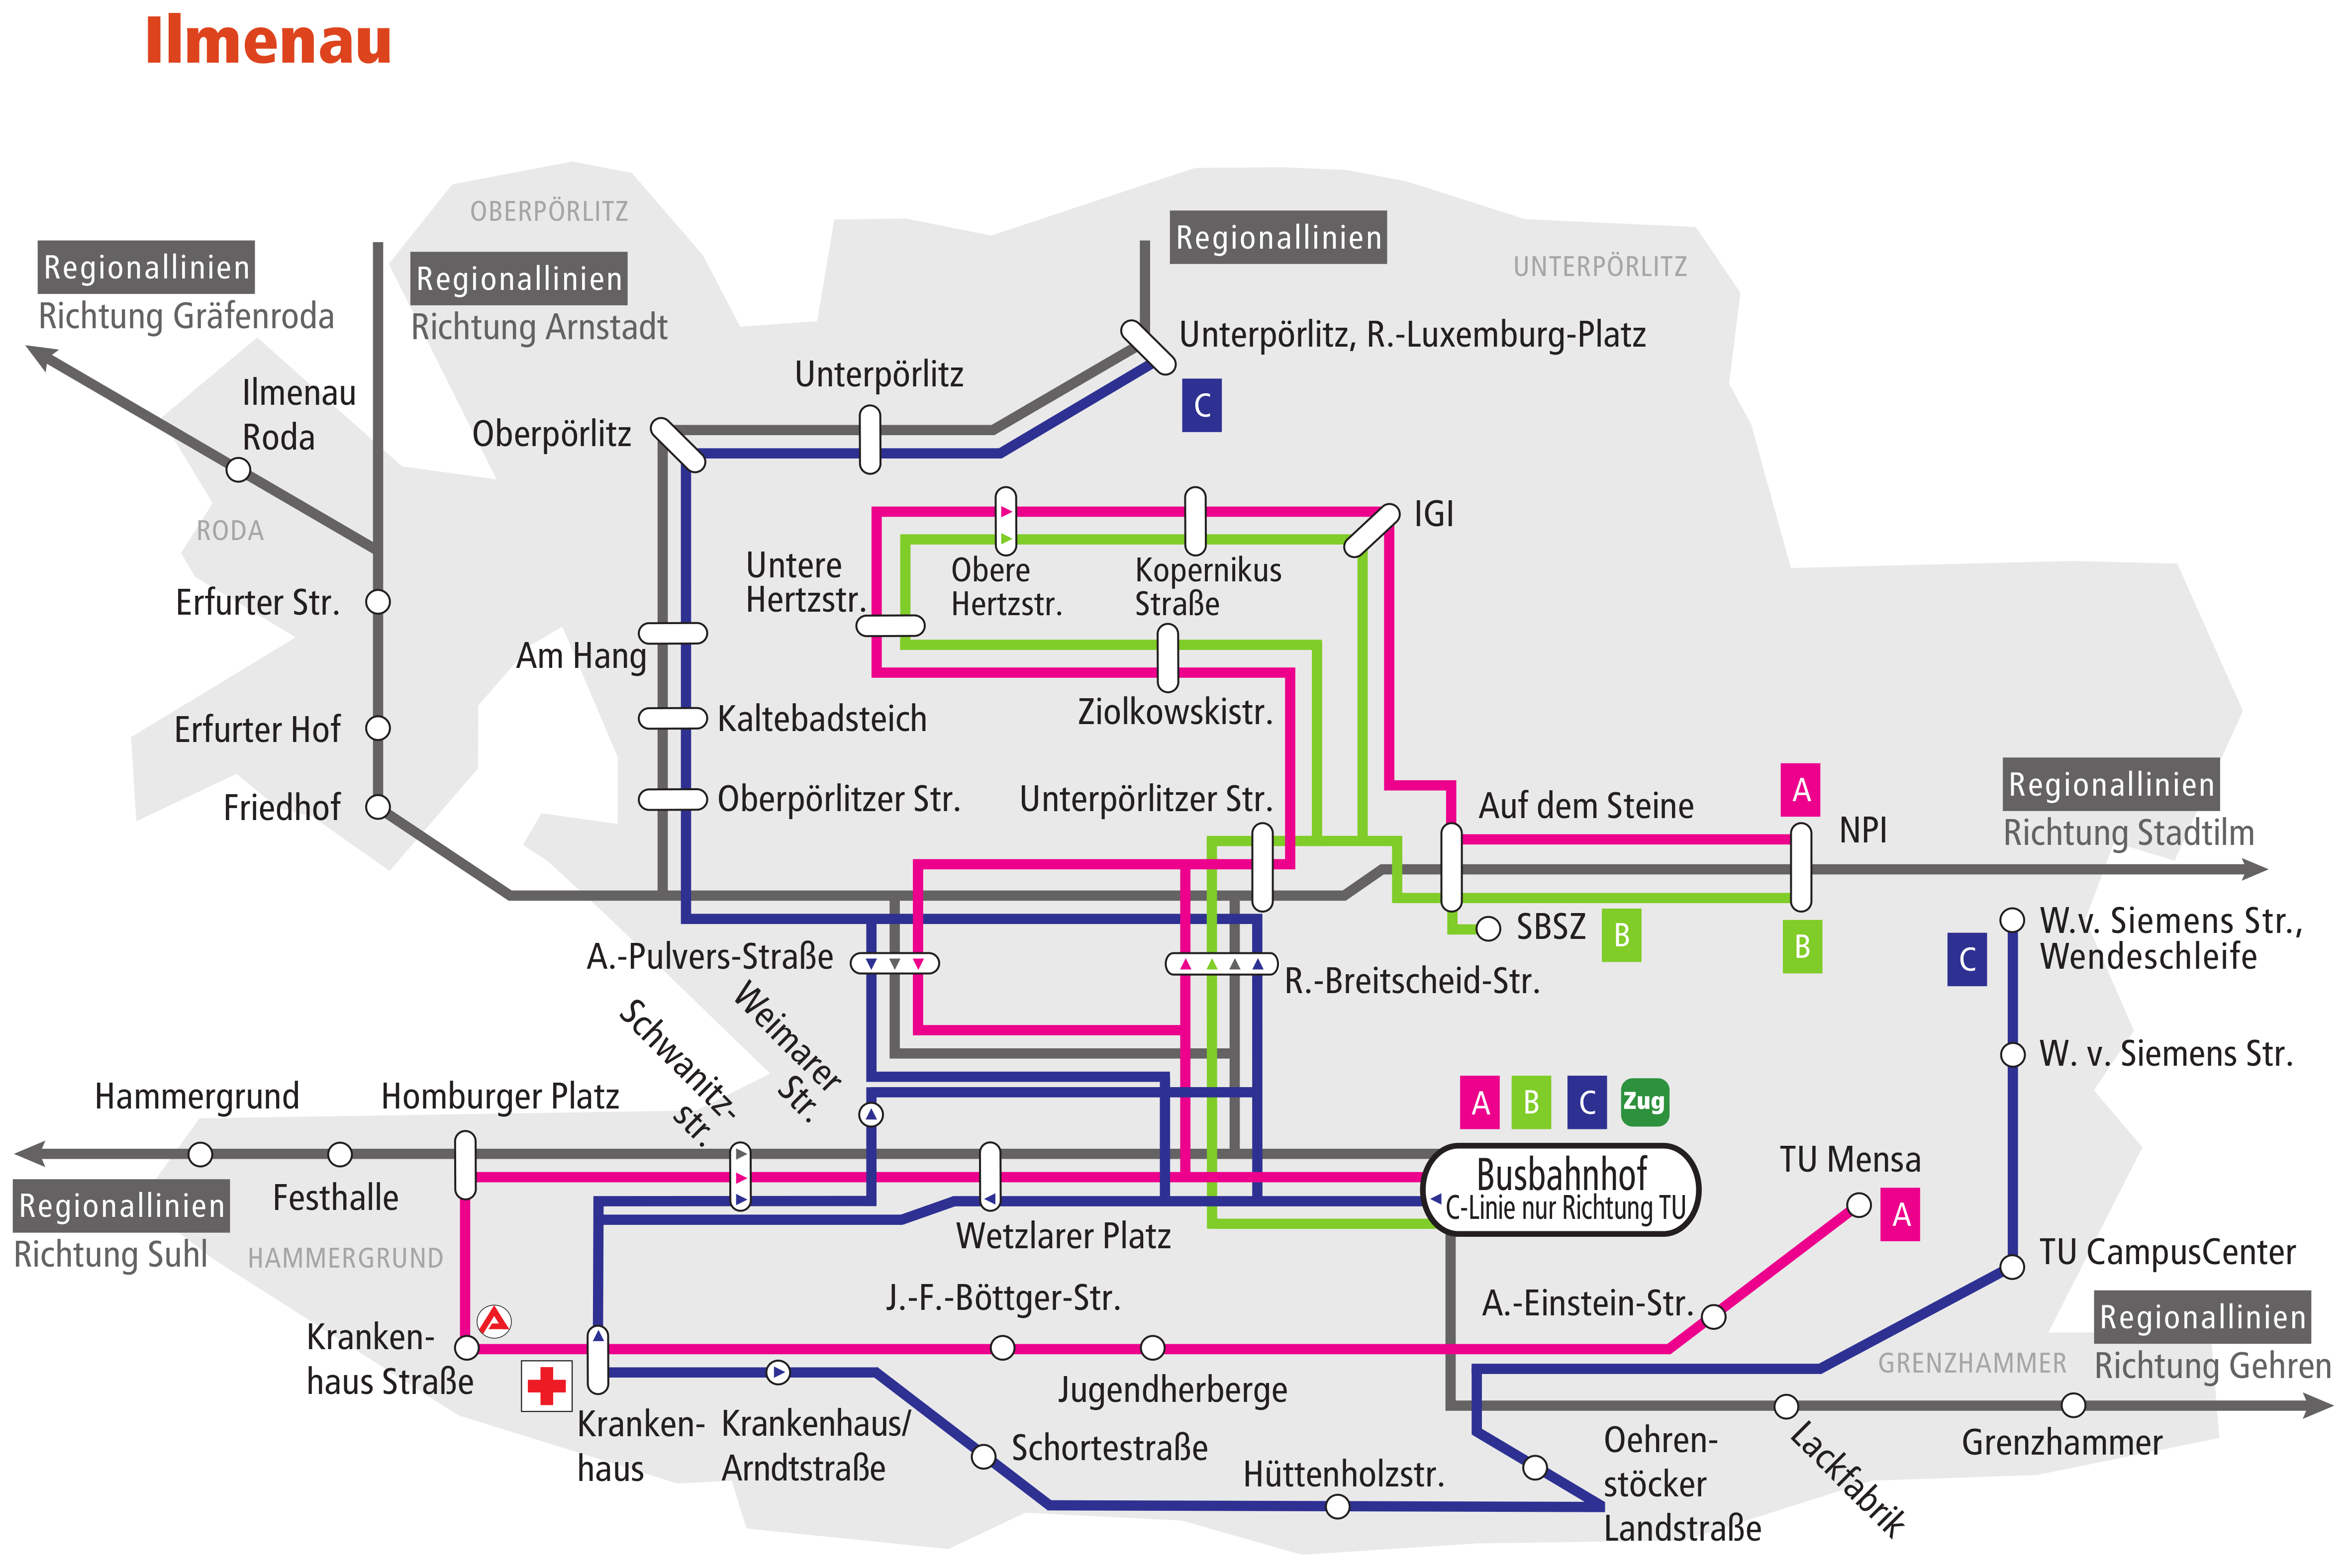
    <br>
    Quelle: <a href="https://www.iov-ilmenau.de/files/16B79438A26/Netzkarte.pdf">Netzkarte IOV Ilmenau</a>
</center>

Kanten können gerichtet sein, um asymmetrische Beziehungen auszudrücken. Im Beispiel des Busnetzes sind Linien gerichtet, die nur in eine Richtung verlaufen, während gegenläufig verkehrende Linien ungerichtete Kanten darstellen. In der voranstehenden Netzkarte können Sie das beispielsweise an den Haltestellen *A.-Pulvers-Straße* und *R.-Breitscheid-Str.* nachvollziehen.

Um eine zusätzliche Dimension einzufügen, können Kanten sogenannte Gewichte beinhalten. Ist das Gewicht beispielsweise die erwartete Reisezeit entlang dieser Strecke bis zur nächsten Haltestelle, kann diese Information für Wegfindungs- und Planungsalgorithmen verwendet werden.

## Formale Definition
Ein Graph ist ein geeordnetes Paar, das aus einer Menge von Knoten ($V$ - Vertices) und einer Menge von Kanten zwischen diesen Knoten ($E \subseteq V \times V$ - Edges) besteht:

$$ G = (V, E) $$

Als Beispiel dient der Graph mit der Knotenmenge $V = \{ A, B, C, D \}$ und der Kantenmenge $E = \{ (A, B), (B, C), (C, D), (D, A) \}$.

Die einfachste Form bilden ungerichtete Graphen. Zwischen zwei Knoten $A$ und $B$ kann bei diesen maximal eine Kante $(A, B)$ bzw. $(B, A)$ existieren.

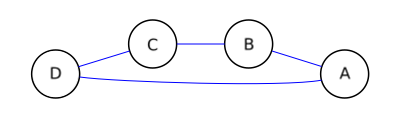

In gerichteten Graphen sind diese beiden Kanten als verschieden anzusehen. Zwischen zwei Knoten können also maximal zwei Kanten verlaufen. Da Quell- und Zielknoten einer Kante zugeordnet werden können, werden die Kanten in der grafischen Darstellung durch Pfeile gekennzeichnet.

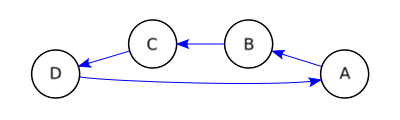

Zusätzlich kann dem Graphen eine Abbildung $d : E \rightarrow \mathbb{R}$ existieren, die jeder Kante ein Gewicht zuordnet.

Schleifen, also eine Kante von einem Knoten zu sich selbst, sollen an dieser Stelle nicht betrachtet werden.

## Isomorphie
Wenn zwei Graphen "gleich" sind, dann unterscheiden sie sich nicht hinsichtlich ihrer Struktur. Mathematisch ausgedrückt existiert eine Abbildung der Knotenmenge des ersten Graphs auf die des zweiten, wobei diese Abbildung Kanten erhalten muss.

Zwei Graphen $G_1 = (V_1, E_1)$ und $G_2 = (V_2, E_2)$ heißen isomorph oder gelten als strukturell gleich, wenn eine Abbildung $f : V_1 \rightarrow V_2$ existiert, sodass diese bijektiv ist und die Kanten erhält. Also gilt
1. $f$ ist bijektiv und
2. $(A, B) \in E_1 \leftrightarrow (f(A), f(B)) \in E_2$.

Daraus folgt auch, dass gleiche Graphen nicht zwangsweise die selbe Darstellungsform besitzen müssen. Die nachfolgenden Graphen sind deshalb isomorph, auch wenn sie zunächst vollkommen verschieden aussehen.



## Repräsentation in Programmen
*Adjazenz* hat seinen Ursprung im Lateinischen (*adiacere*, angrenzen) und bedeutet Nachbarschaft. Der Begriff wird im Zusammenhang mit Graphen verwendet, um die Nachbarschaft zweier Knoten auszudrücken, wenn diese durch eine Kante verbunden sind. Sollen Algorithmen auf diese Graphen effizient angewendet werden, ist es daher notwendig, Informationen über die Adjazenz maschinenlesbar abzuspeichern. Dafür haben sich zwei Modelle etabliert.

### Adjazenzliste
Als Adjazenzliste wird ein Vorgehen bezeichnet, bei dem einem Knoten jeweils eine Liste zugeordnet wird, die alle verbundenen Knoten enthält. In Python lässt sich das beispielsweise mit Hilfe einer Abbildung verwirklichen, die Knoten als Schlüssel und Listen von Knoten als Werte enthält. Verändern Sie etwas die gegebene Abbildung und führen Sie die Zelle erneut aus, um die Änderung in der Darstellung zu sehen.

In [ ]:
adjazenzliste = {
    'A': ['B', 'C'],
    'B': [],
    'C': ['B'],
    'D': []
}

from tui_dsmt.graph import draw_adj_list
draw_adj_list(adjazenzliste)

**Kleine Übungsaufgabe:** Welcher Graph wird repräsentiert? Klicken Sie das zur Adjazenzliste passende Kästchen an und kontrollieren Sie sich selbst. (Sie können die Zelle mehrfach ausführen!)

In [ ]:
from tui_dsmt.graph import guess_adj_list
guess_adj_list()

### Adjazenzmatrix
Die Adjazenzmatrix dagegen bezeichnet eine quadratische Matrix, die Angaben zur Nachbarschaft kodiert. Zunächst werden dafür die Knoten geordnet und durchnummiert. Die Matrix wird dann gebildet, indem in der $i$-ten Reihe und $j$-ten Spalte der Wert $1$ gesetzt wird, falls zwischen dem $i$-ten und $j-ten$ Knoten eine Kante existiert. Andernfalls ist dieser Wert $0$.

In der nachfolgenden Zelle wird die Darstellung aus einer Liste von Listen generiert.

In [ ]:
knoten = ['A', 'B', 'C', 'D']
adjazenzmatrix = [
    [0, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
]

from tui_dsmt.graph import draw_adj_matrix
draw_adj_matrix(knoten, adjazenzmatrix)

In der Realität enthalten Graphen oft viel weniger Kanten als theoretisch möglich wären. Es ist daher auch nicht ungewöhnlich, dass Adjazenzmatrizen dünnbesetzt sind.

**Kleine Übungsaufgabe:** Welcher Graph wird repräsentiert? Klicken Sie das zur Adjazenzmatrix passende Kästchen an und kontrollieren Sie sich selbst. (Sie können die Zelle mehrfach ausführen!)

In [ ]:
from tui_dsmt.graph import guess_adj_matrix
guess_adj_matrix()

**Verständnisfrage:** Welche spezielle Eigenschaft erfüllt die Adjazenzmatrix eines ungerichteten Graphen?

## Dünnbesetzte Matrizen
Die meisten Graphen besitzen eine *relativ geringe* Anzahl an Kanten im Vergleich zu ihren vollständigen Pendants. Ein Graph, der als Knoten alle Artikel der deutschen Wikipedia enthält und Kanten zwischen diesen, sofern ein Artikel auf den anderen verlinkt, besteht aus etwa $4,5$ Millionen Knoten und $100$ Millionen Kanten. Würde jeder Artikel auf jeden anderen verweisen, so wären eine Billiarde Kanten notwendig.

Da nur wenige der möglichen Kanten existieren, sind auch die meisten Einträge Adjazenzmatrix $0$. Im genannten Beispiel sind es weit über $99,99\%$ aller Einträge, was keine Ausnahme darstellt.

**Definition**: Eine dünnbesetzte Matrix (*sparse matrix*) ist eine Matrix, bei welcher der überwiegende Anteil der Einträge $0$ ist.

Die Grenze, aber der eine Matrix als dünnbesetzt gilt, ist nicht fest definiert. In der Regel geht man bei einer $n \!\times\! n$ Matrix von $\mathcal{O}(n)$ bis maximal $\mathcal{O}(n\,\log{}n)$ aus. Informell lässt sich aber sagen, dass eine Matrix dünnbesetzt ist, sobald sich eine alternative Speicherung *lohnt*. Dünnbesetzte Matrizen verbrauchen nämlich - korrekt gespeichert - deutlich weniger Speicherplatz als ihre vollständig abgelegten Pendants. Weiterhin kann ein anderes Layout im Speicher zur Beschleunigung von Matrizenoperationen verwendet werden.

Im Folgenden verwenden wir zur Veranschaulichung die kleine Adjazenzmatrix des vorangegangenen Beispiels.

In [ ]:
A = [
    [0, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
]

### Coordinate List (COO)
Eine Koordinatenliste ist eine Liste mit Einträgen der Form *(Zeile, Spalte, Wert)*. Die Nulleinträge werden nicht in die Liste aufgenommen, um Seicherplatz zu sparen.

In [ ]:
coo = [
    (row, col, A[row][col])
    for row in range(len(A)) for col in range(len(A[row]))
    if A[row][col] > 0
]
coo

Eine Iteration über die Einträge, die nicht $0$ sind, ist damit sehr schnell. Wahlfreier Zugriff hingegen ist dagegen langsam. (Durch Sortierung der Einträge kann aber beispielsweise die binäre Suche angewendet werden.)

### Dictionary of Keys (DOK)
Alternativ lässt sich eine Abbildung verwenden, die Zeile und Spalte als Schlüssel und die Einträge der Matrix als Wert hält. Nulleinträge werden auch hierbei ausgelassen.

In [ ]:
dok = {
    (row, col): A[row][col]
    for row in range(len(A)) for col in range(len(A[row]))
    if A[row][col] > 0
}
dok

Wahlfreier Zugriff ist bei dieser Datenstruktur sehr schnell. Die Iteration dagegen ist langsam. (In Python werden die Schlüssel eines Dictionaries separat abgelegt, um diesem Umstand entgegenzuwirken. Dafür wird aber natürlich mehr Speicher belegt.)

### Compressed Sparse Row (CSR)
Das CSR-Format speichert dünnbesetzte Matrizen in drei eindimensionalen Listen und überspringt dabei ebenfalls die Nullelemente. Diese drei Listen umfassen:
1. **Werte (*V*)**, die Liste aller nicht-Nullelemente der Matrix in der Reihenfolge ihres Auftretens,
2. **Spaltenindizes (*COL_IND*)**, die Spaltenindizes der Elemente in der Liste der Werte, und
3. **Zeilenindizes (*ROW_IND*)**, die Indizes in der Werteliste, an denen jede Zeile beginnt.

Das genannte Beispiel der deutschen Wikipedia erzeugt eine Adjazenzmatrix mit $20$ Billionen Einträgen. Im CSR-Format entstehen Listen mit $100$ Millionnen, $100$ Millionen und $4,5$ Millionen Einträgen. Der Speicherverbrauch wird somit auf $0.001$ Prozent verringert.

Die Transformation einer Matrix $A$ in diese drei Listen kann ich Python beispielsweise wie folgt bewerkstelligt werden:

In [ ]:
def to_csr(A):
    v = []
    col_ind = []
    row_ind = [0]

    for row in A:
        for col, value in enumerate(row):
            if value != 0:
                v.append(value)
                col_ind.append(col)

        row_ind.append(len(v))

    return v, col_ind, row


v, col_ind, row_ind = to_csr(A)

print(f'v       = {v}')
print(f'col_ind = {col_ind}')
print(f'row_ind = {row_ind}')

Die Werte einer Zeile $i$ lassen sich nun einfach mit Hilfe der Liste `row_ind` aus den anderen beiden Listen extrahieren:

In [ ]:
def row(i):
    row_start = row_ind[i]
    row_end   = row_ind[i + 1]

    row_values = v[row_start:row_end]
    row_cols   = col_ind[row_start:row_end]

    return row_values, row_cols

row(0)

Wird nach einem spezifischen Wert an der Position $i, j$ gesucht, funktioniert das wie folgt:

In [ ]:
def val(i, j):
    for col, val in zip(*row(i)):
        if col == j:
            return val

    return 0

val(0, 1)

Das CSR-Format erlaubt nicht nur eine effiziente Speicherung, sondern beschleunigt auch alle Operationen, bei denen durch eine Aufsummierung von Faktoren die Nulleinträge der Matrix nicht ins Ergebnis eingingen.

Eine Matrix-Vektor-Multiplikation lässt sich zum Beispiel wie folgt durchführen:
1. Ein Ergebnisvektor mit der Länge der Anzahl der Zeilen wird mit $0$ initialisiert.
2. Die Zeilen der Matrix werden anhand der Zeilenindizes durchlaufen.
3. Die Spaltenindizes der Zeile werden zum Zugriff auf den Vektor verwendet. Die Werte des Vektors werden dann elementweise mit den Werten der Zeile multipliziert.

In [ ]:
def csr_matrix_vector_mult(v, col_ind, row_ind, vector):
    result = [0 for _ in range(len(row_ind) - 1)]

    for i in range(len(result)):
        print(f'Zeile {i+1}')

        row_values, row_cols = row(i)
        for value, col in zip(row_values, row_cols):
            print(f'   {value} * {vector[col]}')

            result[i] += value * vector[col]

    return result


csr_matrix_vector_mult(v, col_ind, row_ind, [1, 2, 3, 4])

Dabei werden alle Nulleinträge der Matrix übersprungen, da diese im CSR-Format nicht im Speicher abgelegt sind.